# Trabalho 3 - Redes Neurais

Trabalho para compor nota da disciplina Aprendizado de Máquina, pertecente à ementa do curso de mestrado pertencente ao Programa de Pós Graduação em Ciência da Computação, pelo Cefet-RJ.

Prof.: Eduardo Bezerra
    
Aluna: Francimary Garcia
    
Entrega: 20/11/2017

# 1 Redes Completamente Conectadas


Uma instituição ﬁnanceira possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja criar um modelo de classiﬁcação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. 

O conjunto de dados possui 1500 exemplos de créditos concedidos aos seus clientes. Esses registros estão contidos no arquivo credtrain.txt, que é fornecido juntamente com esse documento. Para cada cliente, são deﬁnidos 11 atributos (variáveis, características). Aléem disso, a última coluna de cada exemplo informa se o cliente honrou ou não o pagamento do empréstimo. 

Nesta parte, você deve criar um modelo de classiﬁcação, por meio de uma rede neural de múltiplas camadas com propagação do erro (error backpropagation). O objetivo desse modelo de classiﬁcação é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Esse modelo deve ser criado com o uso de funções e classes fornecidas pelo Keras.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import os 
import scipy.optimize as opt  
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(11)

from sklearn.metrics import confusion_matrix


Esquema do conjunto de dados com histórico de clientes:

Variável Descrição                     Tipo        Domínio

ESCT     Estado civil                  Categórica   0,1,2,3 

NDEP     Número de dependentes         Categórica   0,1,2,3,4,5,6,7 

RENDA    Renda Familiar                Numérica     300-9675 

TIPOR    Tipo de residência            Categórica   0,1 

VBEM     Valor do bem a ser adquirido  Numérica     300-6000 

NPARC    Número de parcelas            Numérica     1-24 

VPARC    Valor da parcela              Numérica     50-719 

TEL      Se o cliente possui telefone  Categórica   0,1 

IDADE    Idade do cliente              Numérica     18-70 

RESMS    Tempo de moradia (em meses)   Numérica     0-420 

ENTRADA  Valor da entrada              Numérica     0-1300 

CLASSE =1 se o cliente pagou a dívida  Categórica   0,1


In [22]:

dataset = np.loadtxt("C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 3\\\\credtrain.csv", delimiter=";")

dataset2 = np.loadtxt("C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 3\\\\credtest.csv", delimiter=";")

# Normalizing data
#dataset = (dataset - dataset.mean()) / dataset.std()
#print(dataset)



In [23]:
# split into input (X) and output (Y) variables=====TRAIN DATASET
X = dataset[:,0:11]
Y = dataset[:,11]
print("Train Dataset:")
print(dataset.shape)
# Train matrix
print(X.shape)
# Target matrix
print(Y.shape)
#print(dataset)

# split into input (X) and output (Y) variables=====TEST DATASET
X2 = dataset2[:,0:11]
Y2 = dataset2[:,11]
print("Test Dataset:")
print(dataset2.shape)
# Train matrix
print(X2.shape)
# Target matrix
print(Y2.shape)
#print(dataset)

Train Dataset:
(1500, 12)
(1500, 11)
(1500,)
Test Dataset:
(577, 12)
(577, 11)
(577,)


Crie uma rede neural artiﬁcial completamente conectada de uma única camada oculta, com 3 neurônios nessa camada oculta e 1 neurônio na camada de saída. Em ambas as camadas, a função de ativação deve ser a função sigmoide logística.


In [24]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


Realize a conﬁguração da rede recém-criada, conforme instruções a seguir. Quantidade de épocas igual a 100.000; Função de perda: soma dos erros quadrados; método de otimização: gradiente descendente estocástico.

In [25]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Treine a rede neural. Esse é o passo em que os pesos e os limiares da rede são ajustados. Esse passo deve ser realizado com a função fit da classe Model. Para chamar essa função, devemos passar à rede, a matriz de padrões e a matriz de alvos.


In [26]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10, verbose=0)


Gere gráﬁcos para visualizar o histórico de treinamento. Em particular, gere curvas da precisão e da função de custo contra a quantidade de épocas de treinamento.

In [27]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


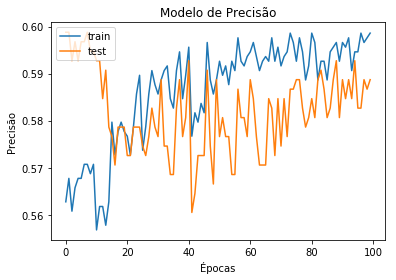

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modelo de Precisão')
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

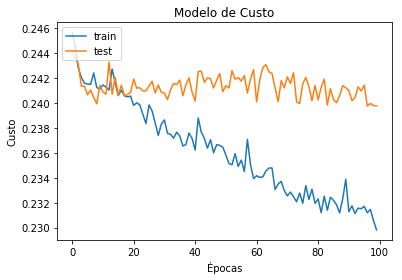

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Custo')
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,

In [34]:
# Confusion matrix 

expected = Y
predicted = rounded
results = confusion_matrix(expected, predicted)
print(results)

[[726  59]
 [546 169]]


In [35]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1500/1500 [==============================] - 0s 95us/step

acc: 59.67%


# 2 Redes Convolucionais


Nesta parte, você irá treinar modelos de redes neurais artiﬁciais para classiﬁcar imagens. Em particular, dada uma imagem, seus modelos deverão indicar se a imagem contém um gato ou não. São fornecidos os conjuntos de imagens para treinamento e para teste (arquivos train catvnoncat.h5 e test catvnoncat.h5).

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import scipy.io
from PIL import Image
from scipy import ndimage


In [133]:
      
def load_dataset():
    
    arquivo = 'C:\\temp\\traincatvnoncat.h5' 
    
    
    #arquivo = "C:\\\Users\\\Raymundo\\\Documents\\\Franci\\\MestradoCEFET\\\7 Aprendizado de Máquina\\\Trabalho 3\\\train_catvnoncat.h5"
    train_dataset = h5py.File(arquivo, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features                      
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    arquivo2 = 'C:\\temp\\test_catvnoncat.h5' 
    test_dataset = h5py.File(arquivo2, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [134]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Abaixo dois exemplos de figuras existentes no dataset fornecido com sua classificação:

y = [1], é a figura de um: cat


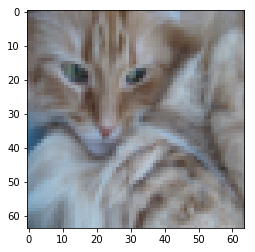

In [169]:
# Example of a picture
index = 2
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", é a figura de um: " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

y = [0], é a figura de um: non-cat


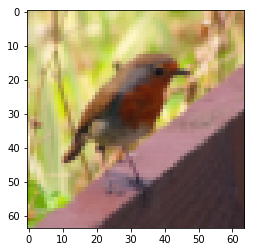

In [170]:
# Example of a picture
index = 10
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", é a figura de um: " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

Após ler os conjuntos de dados, você deve treinar dois modelos utilizando o Keras, conforme descrito a seguir:

• Uma rede completamente conectada de uma única camada oculta e com uma camada de saída de duas unidades com softmax.

• Uma rede convolucional.

Em ambos os casos acima, você deverá selecionar os hiperparâmetros e arquitetura de rede. Procure se basear nos exemplos de código e nas arquiteturas de rede apresentadas em aula. Em seu relatório, apresente os detalhes acerca da deﬁnição de cada uma dessas redes, assim como o desempenho encontrado em cada um dos casos.


Após a importação dos conjuntos de dados, a função de forma será usada para garantir a dimensão do treinamento e do conjunto de testes. Além disso, para padronizar ainda mais o conjunto de dados, em vez de ter os canais vermelho, verde e azul (RGB) para cada pixel, nós o normalizaremos tomando o valor médio, dividindo cada linha do conjunto de dados por 255 (o valor máximo de um canal de pixel).

In [171]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

## standardize dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

Foram criadas duas funções auxiliares sigmoid: usada para calcular a função de ativação e a função de iniciação: usada para inicializar pesos e polarização para os nós de entrada.

In [172]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = None
    s = 1/(1 + np.exp(-z))
    
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

O passo de propagação será criado utilizando as funções auxiliares acima.

In [173]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                     # compute activation
    cost = - 1/m * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)))    # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

Os parâmetros serão atualizados com base nos resultados do Forward propagation e Backward propagation.

In [174]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Dado que temos um modelo treinado, podemos usá-lo para prever os rótulos com novos exemplos de dados:

In [175]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Dado que temos a capacidade de treinar nossos modelos atualizando os parâmetros, e temos a capacidade de prever com o conjunto de dados recém-fornecido, podemos então construir nosso modelo de regressão logística.

In [176]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])  # where to get dimension?

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Usando os dados importados inicialmente, veremos o funcionamento.

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

------------

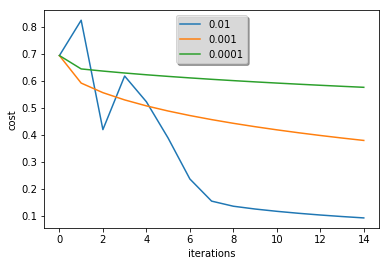

In [177]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Testando o modelo treinado com uma imagem qualquer:

y = 1.0, o algoritmo prediz que a figura é: cat


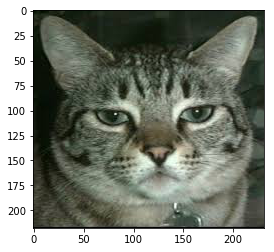

In [183]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
#my_image = 'C:\\temp\\cat1.jpg'   # change this to the name of your image file 
#my_image = 'C:\\temp\\nocat.jpg'  
my_image = 'C:\\temp\\cat2.jpg' 

## END CODE HERE ##

# We preprocess the image to fit your algorithm.
num_px = 64
fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo prediz que a figura é: " + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

y = 0.0, o algoritmo prediz que a figura é: non-cat


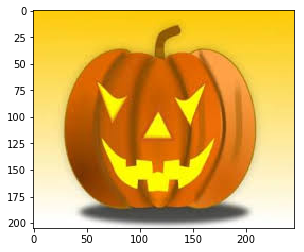

In [184]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
#my_image = 'C:\\temp\\cat1.jpg'   # change this to the name of your image file 
my_image = 'C:\\temp\\noncat.jpg'  
#my_image = 'C:\\temp\\cat2.jpg' 

## END CODE HERE ##

# We preprocess the image to fit your algorithm.
num_px = 64
fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo prediz que a figura é: " + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))